## Aryan Real Estate

In [1]:
import pandas as pd 

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
#housing.hist(bins=50, figsize=( 12, 15))

# Train-Test splitting :

In [10]:
#for learning purpose 
#training & test data spliting manually
import numpy as np
def train_test_split_func(data,test_ratio):
    np.random.seed(42) #using seed(42) , because it helps to shuffle as one pattern whenever i reload it.
    shuffled = np.random.permutation(len(data)) #shuffling data 
    print(shuffled)
    test_set_size = int(len(data)*test_ratio) 
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
#train_set,test_set = train_test_split_func(housing,0.2)

In [12]:
# train test split professionally using sklearn easily
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}")

rows in train set:404
Rows in test set:101


In [13]:
# values CHAS attribute or feature is kind of biased at the time of splitting. 
# before we counted CHAS attribute's 0 and 1.
# by seeing this we are assuming that value 1 in the CHAS feature of test set is not exist.
# to distribute value equally to the training and test set we are using stratified sampling.
from sklearn.model_selection import StratifiedShuffleSplit #importing StratifiedShuffleSplit for sampling
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42) 
for train_index,test_index in split.split(housing,housing['CHAS']): 
    strat_train_set = housing.loc[train_index] #loc is included in pandas
    strat_test_set =housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
94/7 #by doin g this we can clearly see that we disrtributed 0 an 1 to training and test set properly

13.428571428571429

In [17]:
376/28  #by doin g this we can clearly see that we disrtributed 0 an 1 to training and test set properly

13.428571428571429

## Correlation Matrix :

In [18]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)
# value of MEDV 1 is strong point of correlation
# RM is strong positive correlation , so by increasing RM , MEDV will increase, this means RM is the most strong feature. 

MEDV       1.000000
RM         0.695365
ZN         0.360393
B          0.333394
DIS        0.249896
CHAS       0.175364
AGE       -0.376932
RAD       -0.381690
CRIM      -0.388249
NOX       -0.427295
TAX       -0.468543
INDUS     -0.484126
PTRATIO   -0.508411
LSTAT     -0.738187
Name: MEDV, dtype: float64

c:\users\baner\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

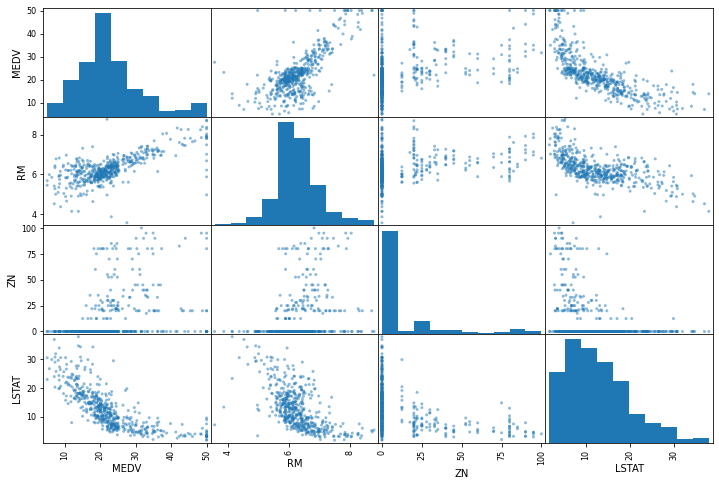

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

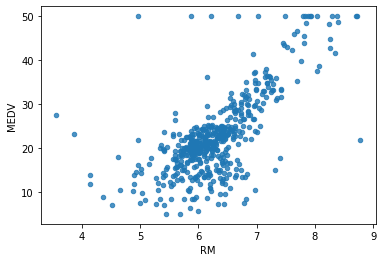

In [20]:
housing.plot(kind="scatter" , x="RM", y="MEDV" , alpha=0.8)

## Trying out attribute combination :

In [21]:
housing['TPM'] = housing["TAX"]/housing["RM"]

In [22]:
housing['TPM']

0      37.688834
1      33.681280
2      31.723350
3      31.061984
4      34.525661
         ...    
500    41.407553
501    44.607843
502    39.134174
503    40.182514
504    45.273632
Name: TPM, Length: 505, dtype: float64

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPM
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,34.525661


In [24]:
corr_matrix['MEDV'].sort_values(ascending = False)
# value of MEDV 1 is strong point of correlation
# RM is strong positive correlation , so by increasing RM , MEDV will increase, this means RM is the most strong feature. 

MEDV       1.000000
RM         0.695365
ZN         0.360393
B          0.333394
DIS        0.249896
CHAS       0.175364
AGE       -0.376932
RAD       -0.381690
CRIM      -0.388249
NOX       -0.427295
TAX       -0.468543
INDUS     -0.484126
PTRATIO   -0.508411
LSTAT     -0.738187
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TPM', ylabel='MEDV'>

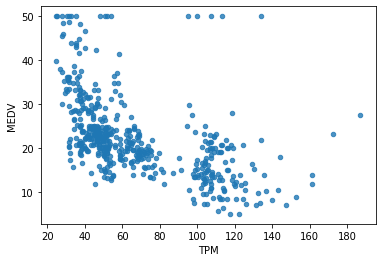

In [25]:
housing.plot(kind="scatter" , x="TPM", y="MEDV" , alpha=0.8)

In [26]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels  = strat_train_set["MEDV"].copy()

## Deal with missing datas : 

## Pipeline Creating :

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [28]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [29]:
housing_num_tr.shape

(404, 13)

In [30]:
train_set.shape

(404, 14)

## Choosing Model and apply

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [32]:
some_data = housing.iloc[:5]

In [33]:
some_labels = housing_labels.iloc[:5]

In [34]:
prepared_data = my_pipeline.transform(some_data)

In [35]:
model.predict(prepared_data)

array([20.601, 27.451, 12.619, 20.701, 21.856])

In [36]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

## Evaluating Model

In [37]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [38]:
rmse

1.2050659414601879

## Cross Validation :

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [40]:
rmse_scores

array([3.2729603 , 2.70611079, 5.11592599, 2.56133345, 2.48570192,
       2.6096876 , 2.89131309, 2.93035246, 2.07135716, 4.40692826])

In [41]:
def print_scores(scores):
    print("Scores :",scores)
    print("Mean :",scores.mean())
    print("std :",scores.std())

In [42]:
print_scores(rmse_scores)

Scores : [3.2729603  2.70611079 5.11592599 2.56133345 2.48570192 2.6096876
 2.89131309 2.93035246 2.07135716 4.40692826]
Mean : 3.10516710040567
std : 0.8941578564648156


In [43]:
from joblib import dump, load
dump(model,'Aryan.joblib')

['Aryan.joblib']

## Testing the model

In [44]:
test_X_set = strat_test_set.drop("MEDV",axis=1)
test_Y_set = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(test_X_set)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(test_Y_set,final_prediction)
final_rmse = np.sqrt(final_mse)
final_prediction

array([22.951, 22.912, 46.726, 32.965, 45.427, 34.411, 20.726, 23.809,
       32.923, 19.539, 18.826, 30.067, 21.964, 33.308, 20.394, 20.543,
       12.803, 20.523, 28.501, 19.707, 20.234, 46.218, 11.964, 18.888,
       25.552, 33.719, 16.578, 15.091,  6.738, 20.266, 23.725, 23.032,
       18.036, 15.038, 21.073, 18.765, 23.118, 17.102, 46.644, 17.984,
       21.325, 18.376, 19.348, 18.242, 33.122,  8.345, 25.102, 14.522,
       20.895, 21.67 , 45.946, 23.574, 15.004, 21.669, 19.854, 47.28 ,
       33.229, 19.86 , 34.537, 10.994, 23.927, 35.619, 33.354, 23.678,
       14.048, 21.186, 20.333, 16.105, 27.801, 24.538, 23.183, 32.091,
       19.149, 31.639, 10.588, 20.201, 41.789, 19.61 , 19.498, 14.935,
       42.423,  9.434, 34.835, 22.852, 27.901, 15.444, 22.9  , 21.803,
       20.719, 15.773, 26.684, 10.264, 32.969, 12.925, 26.677, 20.19 ,
       33.005, 13.754, 21.14 , 20.866, 20.619])

In [45]:
final_rmse

3.3289473658134696

## Using the model

In [46]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])

In [52]:
from joblib import dump, load
import numpy as np
model = load('Aryan.joblib') 
features = np.array([[-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679]])
model.predict(features)

array([20.601])